epoch       0.000 | loss_total     0.00134 | train_MAE     0.94445 | valid_MAE     0.94471 | grad_wrt_mu     0.00011 | grad_wrt_b_per_user     0.00000 | grad_wrt_c_per_item     0.00000 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.014 | loss_total     0.00122 | train_MAE     0.94446 | valid_MAE     0.94472 | grad_wrt_mu     0.00004 | grad_wrt_b_per_user     0.00000 | grad_wrt_c_per_item     0.00000 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.029 | loss_total     0.00127 | train_MAE     0.94445 | valid_MAE     0.94472 | grad_wrt_mu     0.00018 | grad_wrt_b_per_user     0.00000 | grad_wrt_c_per_item     0.00000 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.043 | loss_total     0.00129 | train_MAE     0.94443 | valid_MAE     0.94469 | grad_wrt_mu     0.00001 | grad_wrt_b_per_user     0.00000 | grad_wrt_c_per_item     0.00000 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.129 | loss_total     0.00125 | train_MAE     0

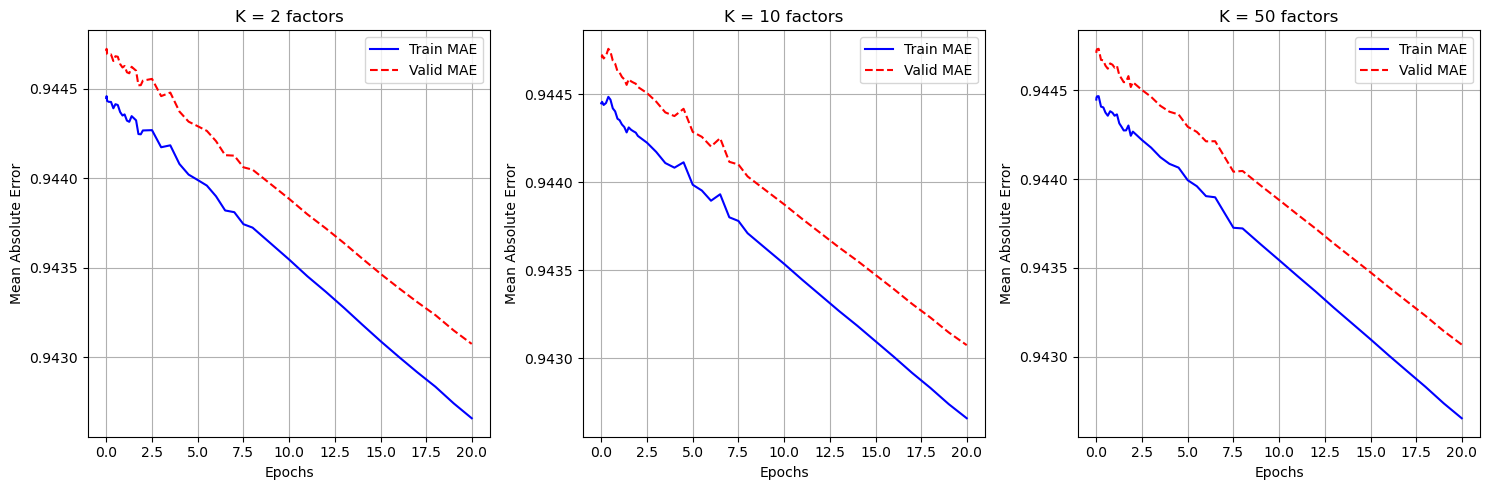

In [1]:
import matplotlib.pyplot as plt
from train_valid_test_loader import load_train_valid_test_datasets
from CollabFilterOneVectorPerItem import CollabFilterOneVectorPerItem

# Load the datasets
train_tuple, valid_tuple, test_tuple, n_users, n_items = load_train_valid_test_datasets()

# Set up the plot
plt.figure(figsize=(15, 5))

# Train models with different K values
k_values = [2, 10, 50]
for idx, k in enumerate(k_values):
    # Create and train model
    model = CollabFilterOneVectorPerItem(
    n_epochs=20,          
    batch_size=1000,      # Smaller batch size for more frequent updates
    step_size=1.0,        # Larger step size since our gradients should be smaller now
    n_factors=k,          # K will be 2, 10, or 50
    alpha=0.1             # Moderate regularization
    )
    
    # Initialize and fit the model
    model.init_parameter_dict(n_users, n_items, train_tuple)
    model.fit(train_tuple, valid_tuple)
    
    # Create subplot for this K value
    plt.subplot(1, 3, idx + 1)
    
    # Plot training and validation MAE vs epoch
    plt.plot(model.trace_epoch, model.trace_mae_train, 'b-', label='Train MAE')
    plt.plot(model.trace_epoch, model.trace_mae_valid, 'r--', label='Valid MAE')
    
    plt.title(f'K = {k} factors')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Absolute Error')
    plt.legend()
    plt.grid(True)
    
    # Print final performance metrics
    final_train_mae = model.trace_mae_train[-1]
    final_valid_mae = model.trace_mae_valid[-1]
    print(f"\nResults for K = {k}:")
    print(f"Final Training MAE: {final_train_mae:.4f}")
    print(f"Final Validation MAE: {final_valid_mae:.4f}")

plt.tight_layout()
plt.show()